# Biosignals Processing in Python

Welcome to the course for biosignals processing using NeuroKit and python. You'll find the necessary files to run this example in the [**examples**](https://github.com/neuropsychology/NeuroKit.py/tree/master/examples/Bio) section.

### Import Necessary Packages

In [1]:
# Import packages
import neurokit as nk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

# Plotting preferences
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [14.0, 10.0]  # Bigger figures
sns.set_style("whitegrid")  # White background
sns.set_palette(sns.color_palette("colorblind"))  # Better colours

## Block Paradigms

### Preprocessing

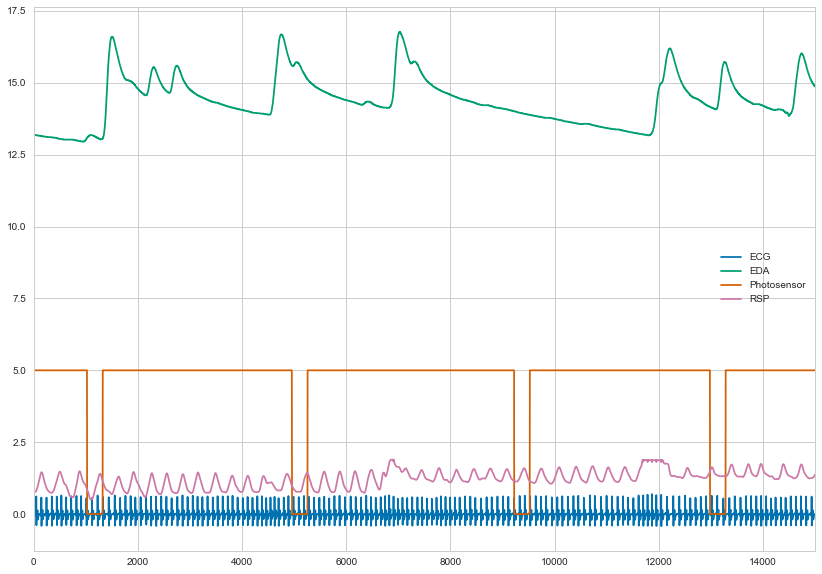

In [2]:
# Download resting-state data
df = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit.py/master/examples/Bio/bio_100Hz.csv")
# Plot it
df.plot()

`df` contains 2.5 minutes of data recorded at 100Hz (2.5 x 60 x 100 = 15000 data points). There are 4 channels, EDA, ECG, RSP and the Photosensor used to localize events. In the present case, there is four events, corresponding to emotionally negative and neutral pictures presented for 3 seconds.

### Processing

Biosignals processing can be done quite easily using `NeuroKit` with the `bio_process()` function. Simply provide the appropriate biosignal channels and additional channels that you want to keep (for example, the photosensor), and `bio_process()` will take care of the rest. It will returns a dict containing a dataframe `df`, including the raw as well as processed signals, and features relevant to each provided signal.

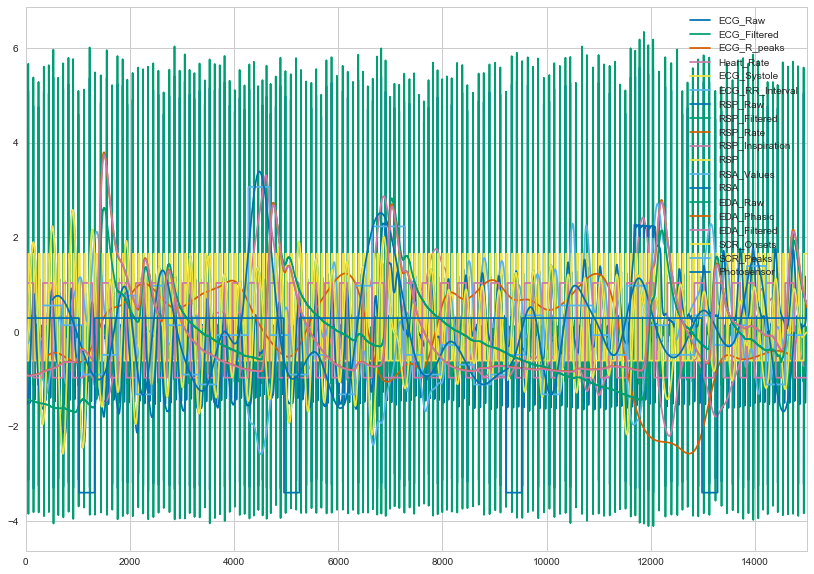

In [6]:
# Process the signals
bio = nk.bio_process(ecg=df["ECG"], rsp=df["RSP"], eda=df["EDA"], add=df["Photosensor"], sampling_rate=100)
# Plot the processed dataframe, normalizing all variables for viewing purpose
nk.z_score(bio["df"]).plot()

**Waou, there's a lot going on there!** From 3 variables of interest (ECG, RSP and EDA), `bio_process()` produced 18 signals. Moreover, the `bio` dict contains three other dicts, `ECG`, `RSP` and `EDA` containing other features that cannot be simply added in a dataframe. Let's see what we can do with that.

### Bio Features Extraction

#### ECG Signal quality

In [12]:
bio["ECG"]["Average_Signal_Quality"]  # Get average quality

0.9855753217220407

As you can see, the average quality of the ECG signal is 99%. See this *TO BE DONE* tutorial for how to record a good signal.

#### Heart Beats

Let's take a look at each individual heartbeat, synchronized by their R peak. You can plot all of them by doing the following:

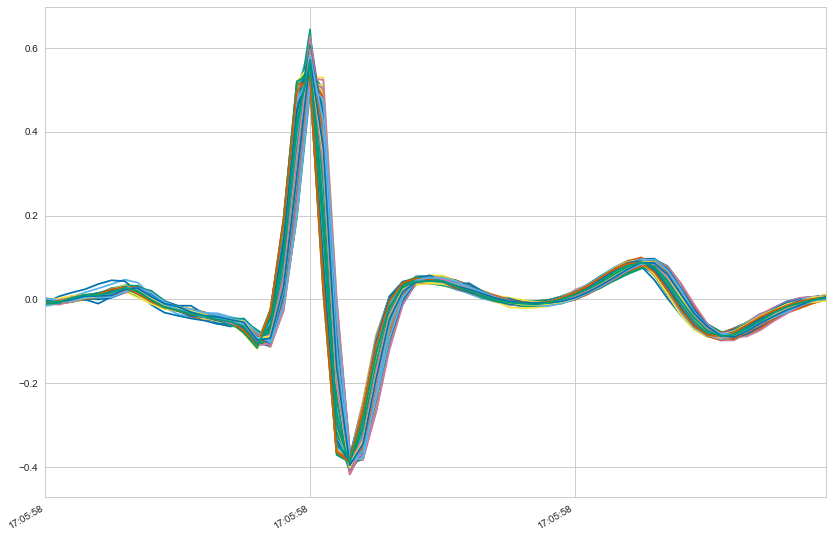

In [13]:
pd.DataFrame(bio["ECG"]["Cardiac_Cycles"]).plot(legend=False)  # Plot all the heart beats

#### Heart Rate Variability (HRV)

In [15]:
 bio["ECG"]["HRV"]

{'CVSD': 7.3239149339068961,
 'Correlation_Dimension': 1.4235100962851328,
 'DFA_1': 1.1761650561610433,
 'DFA_2': 0.87905309717757019,
 'Entropy_Multiscale': 2.2424811689243405,
 'Entropy_SVD': 0.2199729022985194,
 'Entropy_Spectral_HF': 0.03522448703905573,
 'Entropy_Spectral_LF': 0.03522448703905573,
 'Entropy_Spectral_VLF': 0.03522448703905573,
 'FD_Higushi': 1.8820430176419449,
 'FD_Petrosian': 1.0344021541643655,
 'Fisher_Info': 0.89559909165295126,
 'HF': 0.14290642433541428,
 'HF/P': 1.919328414125459e-05,
 'HFn': 0.0017076177366138724,
 'LF': 83.544690202993593,
 'LF/HF': 584.611157906426,
 'LF/P': 0.011220608065845888,
 'LFn': 0.99829238226338624,
 'Lyapunov': -0.00027193109,
 'RMSSD': 72.204036028410115,
 'RR_Interval': 0         980.000000
 1         979.437996
 2         978.895153
 3         978.371298
 4         977.866256
 5         977.379853
 6         976.911914
 7         976.462267
 8         976.030736
 9         975.617148
 10        975.221328
 11        974.843

In [3]:
 bio["ECG"].keys()
    
    # We want to find events on the Photosensor channel, when it goes down (hence, cut is set to lower).
events = nk.find_events(df["Photosensor"], cut="lower") 
print(events)

{'onsets': array([14097]), 'durations': array([300066])}


`find_events` returns a dict containing onsets and durations of each event. Here, it correctly detected only one event. Then, we're gonna crop our data according to that event. The `create_epochs` function returns a list containing epochs of data corresponding to each event. As we have only one event, we're gonna select the `0`th element of that list. 

In [4]:
df = nk.create_epochs(df, events["onsets"], duration=events["durations"], onset=0)
df = df[0]  # Select the first (0th) element of that list.

Aside from this dataframe, `bio` contains also several features computed signal wise.

#### Heart-Rate Variability (HRV)

Many indices of HRV, a finely tuned measure of heart-brain communication, are computed.

In [6]:
bio["ECG"]["HRV"]

{'HRV_MHR': 81.754606510964052,
 'HRV_MRRI': 737.28888888888889,
 'HRV_NN50': 35,
 'HRV_PNN50': 8.6633663366336631,
 'HRV_RMSSD': 28.808990277204774,
 'HRV_SDNN': 50.505053173317258}

#### Respiratory Sinus Arrythmia (RSA)

TO BE DONE.

#### Entropy

TO BE DONE.

In [7]:
bio["ECG"]["Heart_Beats"]

array([[ 0.00211676,  0.00157002,  0.00105949, ...,  0.01240271,
         0.0123529 ,  0.01220028],
       [-0.00509807, -0.00601575, -0.00685135, ...,  0.00909911,
         0.00918708,  0.00926121],
       [-0.00644503, -0.00647698, -0.00653955, ...,  0.00381939,
         0.0041481 ,  0.00446852],
       ..., 
       [-0.00183557, -0.00230614, -0.00290788, ...,  0.01037158,
         0.01045849,  0.01059471],
       [-0.00977677, -0.01045616, -0.01095953, ...,  0.00568657,
         0.00610441,  0.00663598],
       [-0.01260879, -0.01234637, -0.01203481, ...,  0.00770381,
         0.00848276,  0.00919211]])

In [7]:
# Print all the HRV indices
bio["ECG_Features"]["ECG_HRV"]

{'HRV_hf': 235.12,
 'HRV_hfnu': 12.27,
 'HRV_lf': 1681.79,
 'HRV_lf_hf': 7.1500000000000004,
 'HRV_lfnu': 87.730000000000004,
 'HRV_mhr': 78.969999999999999,
 'HRV_mrri': 763.14999999999998,
 'HRV_nn50': 13.0,
 'HRV_pnn50': 4.7800000000000002,
 'HRV_rmssd': 24.699999999999999,
 'HRV_sdnn': 50.920000000000002,
 'HRV_total_power': 2280.6799999999998,
 'HRV_vlf': 363.76999999999998}

## Event-Related Analysis

This experiment consisted of 8 events (when the photosensor signal goes down), which were 2 types of images that were shown to the participant: "Negative" vs "Neutral". The following list is the condition order.

In [12]:
condition_list = ["Negative", "Negative", "Neutral", "Neutral", "Neutral", "Negative", "Negative", "Neutral"]

### Find Events

First, we must find events onset within our photosensor's signal using the `find_events()` function. This function requires a treshold and a cut direction (should it select events that are *higher* or *lower* than the treshold).

In [8]:
events = nk.find_events(df["Photosensor"], treshold = 3, cut="lower")
events

{'duration': array([5030, 5030, 5030, 5031, 5031, 5030, 5030, 5031]),
 'onsets': array([ 15905,  37074,  65874,  87457, 110673, 130425, 156113, 186697])}

### Create Epochs

Then, we divise our dataframe in epochs, *i.e.* segments of data around the event. We set our epochs to start at the event start (`onset=0`) and to last for 5000 data points, in our case equal to 5 s (since the signal is sampled at 1000Hz).

In [10]:
epochs = nk.create_epochs(bio["Bio"], events["onsets"], duration=5000, onset=0)

### Create Evoked-Data

We can then itereate through the epochs and store the interesting results in a new dict that will be, at the end, converted to a dataframe.

In [13]:
evoked = {}  # Initialize an empty dict
for epoch in epochs:
    evoked[epoch] = {}  # Initialize an empty dict for the current epoch
    evoked[epoch]["Heart_Rate"] = epochs[epoch]["Heart_Rate"].mean()  # Heart Rate mean
    evoked[epoch]["RSP_Rate"] = epochs[epoch]["RSP_Rate"].mean()  # Respiration Rate mean
    evoked[epoch]["EDA_Filtered"] = epochs[epoch]["EDA_Filtered"].mean()  # EDA mean
    evoked[epoch]["EDA_Max"] = max(epochs[epoch]["EDA_Filtered"])  # Max EDA value
    
    # SRC_Peaks are scored np.nan (NaN values) in the absence of peak. We want to change it to 0
    if np.isnan(epochs[epoch]["SCR_Peaks"].mean()):
        evoked[epoch]["SCR_Peaks"] = 0
    else:
        evoked[epoch]["SCR_Peaks"] = epochs[epoch]["SCR_Peaks"].mean()

evoked = pd.DataFrame.from_dict(evoked, orient="index")  # Convert to a dataframe
evoked["Condition"] = condition_list  # Add the conditions
evoked  # Print

,EDA_Max,Heart_Rate,SCR_Peaks,EDA_Filtered,RSP_Rate,Condition
0,2.904791,76.692448,0.002233,1.119592,9.899207,Negative
1,1.401832,77.758983,0.001362,0.228276,15.088623,Negative
2,0.333022,86.674810,0.000000,0.170198,12.570695,Neutral
3,0.617933,71.802572,0.000000,0.289176,17.845710,Neutral
4,1.120845,72.209853,0.000000,0.700019,15.900692,Neutral
5,2.199279,79.131237,0.001678,1.128347,16.889012,Negative
6,3.707069,80.894028,0.002566,1.398594,17.058186,Negative
7,3.543960,81.304369,0.000000,2.009089,15.289368,Neutral


### Plot Results

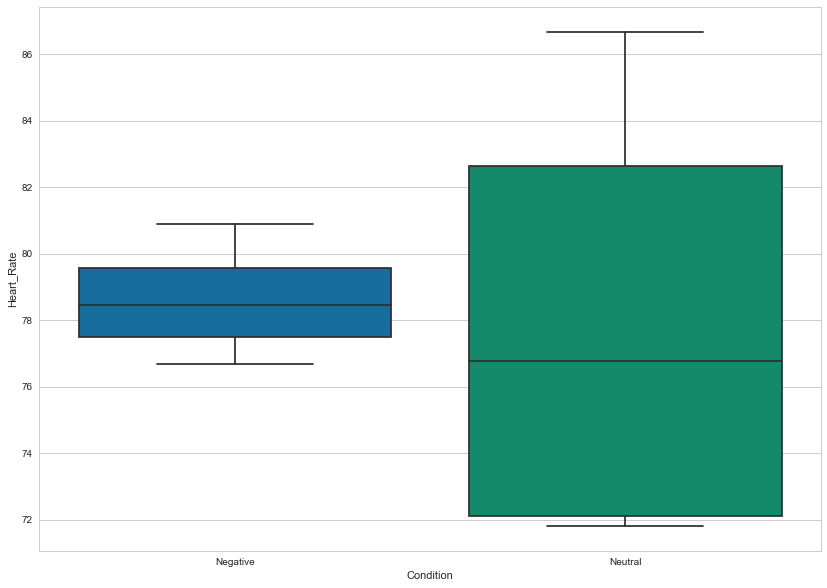

In [14]:
sns.boxplot(x="Condition", y="Heart_Rate", data=evoked)

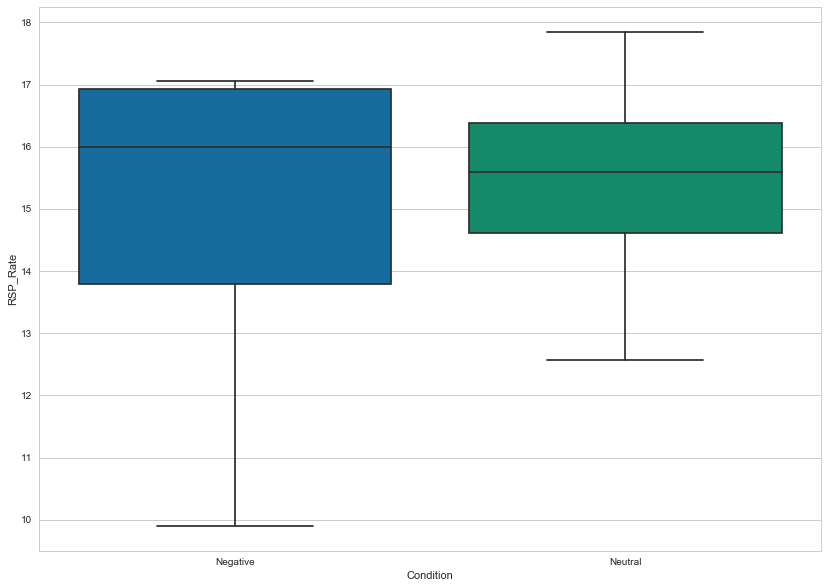

In [15]:
sns.boxplot(x="Condition", y="RSP_Rate", data=evoked)

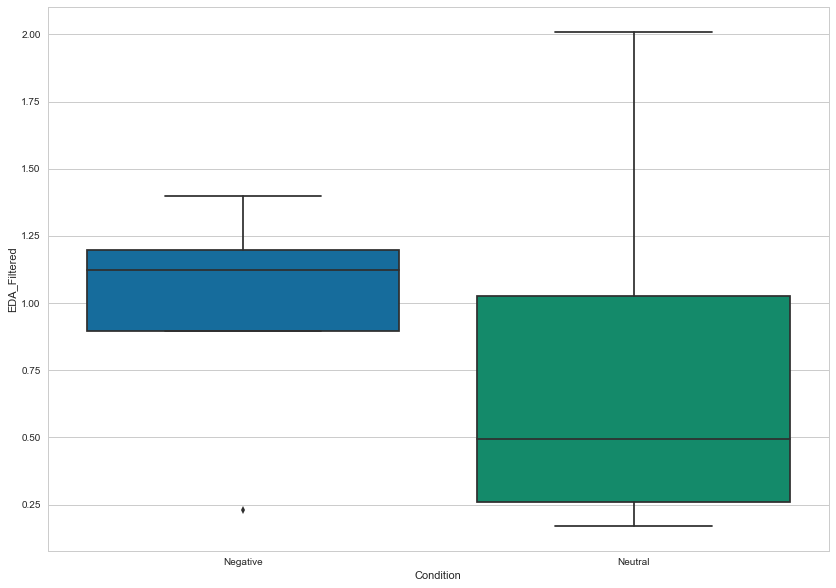

In [16]:
sns.boxplot(x="Condition", y="EDA_Filtered", data=evoked)

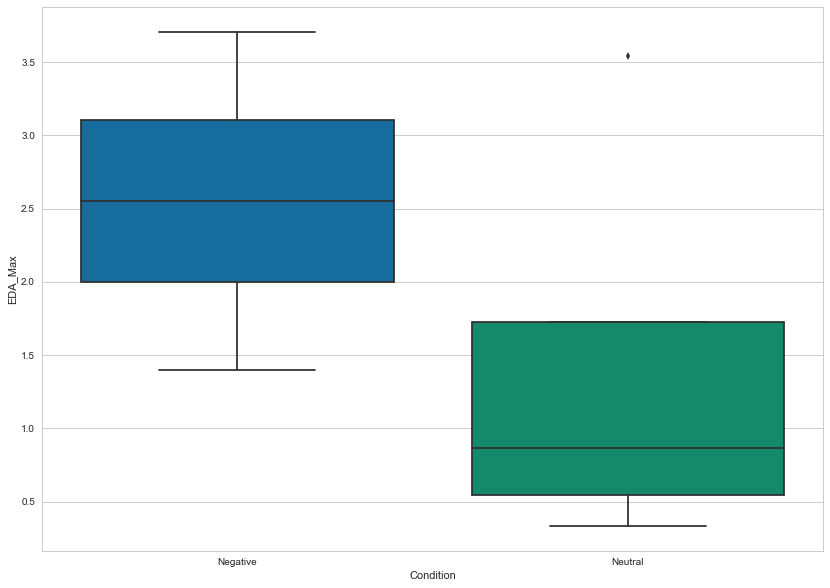

In [17]:
sns.boxplot(x="Condition", y="EDA_Max", data=evoked)

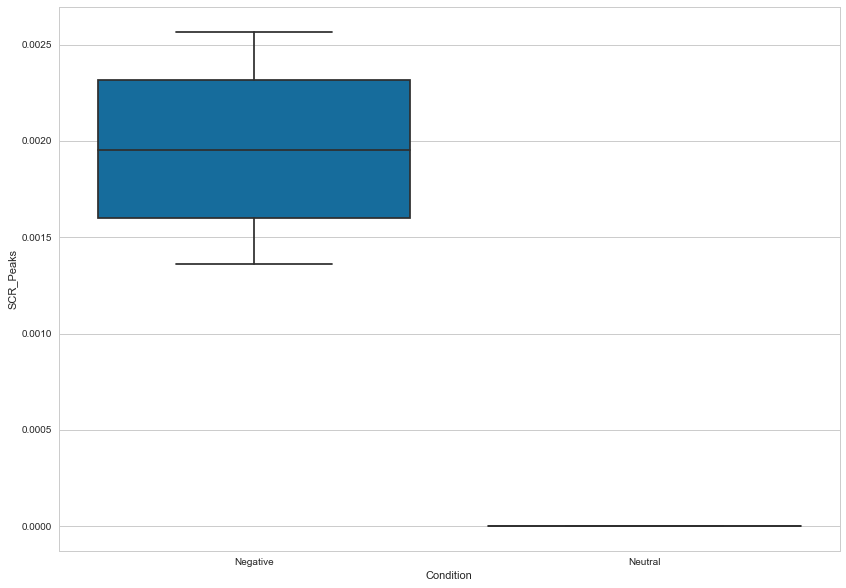

In [18]:
sns.boxplot(x="Condition", y="SCR_Peaks", data=evoked)